# Análisis de Datos con Python
### Ariel Palazzesi - 2025

----
## Actividad 1: Análisis de Ventas de Diamantes
----
### **Análisis exploratorio del conjunto de datos "diamonds"**

En este cuaderno realizaremos un **análisis exploratorio de datos (EDA)** sobre el conjunto de datos `diamonds` incluido en la librería **Seaborn**.

El objetivo es **familiarizarnos con técnicas de visualización y resumen estadístico**, aplicando herramientas de Python para explorar las características y relaciones presentes en los datos.

---

### **Objetivos específicos**

* Importar las bibliotecas necesarias y cargar el conjunto de datos "diamonds".
* Visualizar las primeras filas del DataFrame para comprender su estructura.
* Realizar un resumen estadístico de las variables numéricas.
* Crear un gráfico de distribución de los precios.
* Crear un gráfico de distribución por color.
* Interpretar los resultados y justificar la elección de los gráficos.

In [1]:
# ============================================================
# 1. Importar bibliotecas necesarias y cargar el dataset
# ============================================================

# Importamos las librerías principales para análisis y visualización
import numpy as np               # Cerca del final creamos unos "bins"
import pandas as pd              # Para manejo y análisis de datos tabulares
import seaborn as sns            # Para visualización estadística
import matplotlib.pyplot as plt  # Para gráficos más detallados o combinados

# Cargar el dataset "diamonds" desde Seaborn
diamonds = sns.load_dataset("diamonds")

# Confirmamos que se cargó correctamente
print("Dataset cargado con éxito. Cantidad de filas y columnas:")
diamonds.shape


Dataset cargado con éxito. Cantidad de filas y columnas:


(53940, 10)

### **Descripción general del dataset `diamonds`**

El dataset **`diamonds`** de Seaborn contiene información real de **más de 53 000 diamantes** comercializados, con distintas características físicas y de calidad, junto con su precio en dólares.

Es un conjunto clásico en análisis de datos porque combina variables **numéricas** y **categóricas**, ideal para practicar exploraciones, correlaciones y visualizaciones.

---

| Columna     | Tipo de dato         | Descripción                                                                                                                                    |
| ----------- | -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **carat**   | numérica (float)     | Peso del diamante en quilates. Es una de las variables más influyentes en el precio.                                                           |
| **cut**     | categórica (ordinal) | Calidad del corte, que afecta el brillo y la apariencia. Valores: *Fair, Good, Very Good, Premium, Ideal*.                                     |
| **color**   | categórica (ordinal) | Grado de color del diamante, donde **D** es el más incoloro (mejor) y **J** el más amarillento.                                                |
| **clarity** | categórica (ordinal) | Grado de pureza o nivel de imperfecciones internas (inclusiones). Escala: *I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF* (de menor a mayor calidad). |
| **depth**   | numérica (float)     | Profundidad total del diamante expresada como porcentaje del diámetro medio. Influye en la proporción visual.                                  |
| **table**   | numérica (float)     | Ancho de la cara superior (table) en relación al ancho promedio del diamante. También afecta el brillo.                                        |
| **price**   | numérica (int)       | Precio del diamante en dólares estadounidenses (USD).                                                                                          |
| **x**       | numérica (float)     | Longitud del diamante en milímetros.                                                                                                           |
| **y**       | numérica (float)     | Ancho del diamante en milímetros.                                                                                                              |
| **z**       | numérica (float)     | Profundidad del diamante en milímetros.                                                                                                        |

---

El dataset combina **medidas físicas** (`carat`, `x`, `y`, `z`, `depth`, `table`) con **atributos cualitativos** de evaluación (`cut`, `color`, `clarity`), permitiendo estudiar cómo estos factores afectan al **precio final**.




### **2. Visualizar las primeras filas del DataFrame**

Antes de comenzar cualquier análisis, es importante **explorar la estructura del dataset**:

* Qué variables contiene.
* Qué tipo de datos hay en cada columna (numéricos, categóricos, etc.).
* Si los valores parecen consistentes y completos.

A continuación veremos las primeras filas del conjunto de datos `diamonds` para familiarizarnos con su contenido.



In [2]:
# ============================================================
# 2. Visualizar las primeras filas del DataFrame
# ============================================================

# Mostrar las primeras 5 filas del dataset
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



### **3. Resumen estadístico de las variables numéricas**

Un **resumen estadístico** nos permite observar rápidamente las características principales de las variables numéricas:

* Valor mínimo y máximo.
* Media (promedio) y mediana.
* Desvío estándar (variabilidad).
* Cuartiles (valores que dividen los datos en cuatro partes).

Estos indicadores son útiles para **detectar posibles valores atípicos**, comprender la **escala de precios** y evaluar la **dispersión** de los datos.


In [3]:
# ============================================================
# 3. Resumen estadístico de los datos numéricos
# ============================================================

# Mostrar un resumen estadístico de las columnas numéricas
diamonds.describe().round(2)

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


### **4. Gráfico de distribución de precios**

El precio es una de las variables más importantes del dataset.
Para analizar cómo se distribuyen los precios de los diamantes, utilizaremos un **histograma** con Seaborn.

Este tipo de gráfico nos permite observar:

* La **frecuencia** con la que aparecen ciertos rangos de precios.
* Si la distribución está concentrada en valores bajos, medios o altos.
* La **forma general** (asimétrica, normal, etc.) de la distribución.


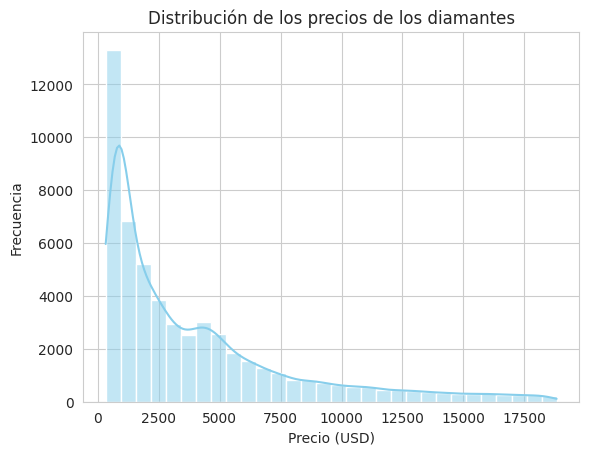

In [4]:
# ============================================================
# 4. Gráfico de distribución de precios
# ============================================================

# Configurar estilo visual
sns.set_style("whitegrid")

# Crear histograma del precio de los diamantes
sns.histplot(
    data=diamonds,          # DataFrame a utilizar
    x="price",              # Variable del eje X
    bins=30,                # Número de divisiones (puede ajustarse)
    kde=True,               # Agrega la curva de densidad
    color="skyblue"         # Color de las barras
)

# Personalizar el gráfico
plt.title("Distribución de los precios de los diamantes")
plt.xlabel("Precio (USD)")
plt.ylabel("Frecuencia")
plt.show()

### **5. Gráfico de distribución por color**

La variable `color` clasifica los diamantes según su **grado de color**, donde **“D”** representa el color más puro y **“J”** el más amarillento.

Para visualizar cómo se distribuyen los precios según el color, utilizaremos un **boxplot (diagrama de cajas)**.
Este tipo de gráfico permite comparar:

* La **mediana** del precio para cada color.
* El **rango intercuartílico** (variabilidad central).
* La presencia de **valores atípicos** (puntos fuera de la caja).


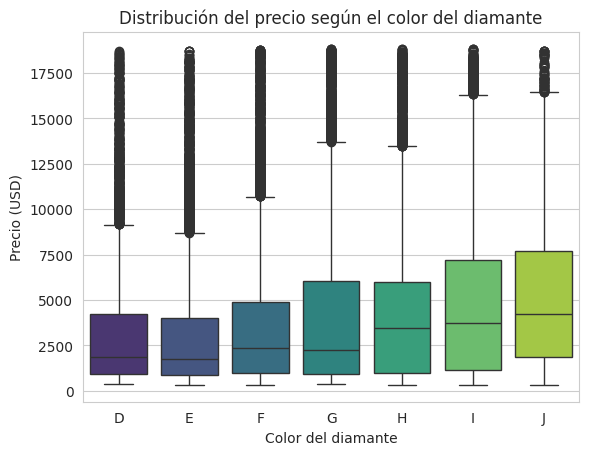

In [5]:
# ============================================================
# 5. Gráfico de distribución por color
# ============================================================

# Crear un boxplot que muestre cómo varía el precio según el color
sns.boxplot(
    data=diamonds,     # Dataset
    x="color",          # Variable categórica (color del diamante)
    y="price",          # Variable numérica (precio)
    hue="color",
    palette="viridis"   # Paleta de colores
)

# Personalizar el gráfico
plt.title("Distribución del precio según el color del diamante")
plt.xlabel("Color del diamante")
plt.ylabel("Precio (USD)")
plt.show()


### **6. Interpretación de los resultados**

**Distribución de precios:**
El histograma muestra que la mayoría de los diamantes tienen **precios relativamente bajos**, concentrados en el rango inicial.
A medida que el precio aumenta, la frecuencia de diamantes disminuye drásticamente.
Esto sugiere que los diamantes de muy alto valor son menos comunes —algo esperable en un mercado real—.
La curva de densidad (KDE) refuerza esta tendencia, indicando una **distribución asimétrica hacia la derecha** (sesgo positivo).

**Distribución por color:**
El boxplot evidencia que los diamantes con color cercano a **“D” (más puros)** tienden a tener **precios más altos**, aunque con mayor dispersión y presencia de valores atípicos.
En cambio, los colores más amarillentos (“I”, “J”) presentan precios más bajos y menor variabilidad.
Esto refleja la influencia del color sobre el valor comercial del diamante.

**Justificación de los gráficos elegidos:**

* El **histograma** permite observar la **distribución global de precios**, mostrando concentraciones y sesgos.
* El **boxplot** es ideal para comparar grupos categóricos (en este caso, colores), destacando medianas, rangos y valores extremos.

En conjunto, ambos gráficos brindan una **visión complementaria**: uno describe el comportamiento general de los precios y el otro su relación con una característica específica del producto.


----
## Actividad 2: Análisis de Supervivencia
----


### **Análisis exploratorio del conjunto de datos “Titanic”**

Comenzamos con un **análisis exploratorio** del dataset `titanic` incluido en la librería **Seaborn**, que contiene información sobre los pasajeros del famoso transatlántico hundido en 1912.

El propósito es **examinar las relaciones entre distintas variables** (como edad, clase o sexo) y la **tasa de supervivencia**, utilizando gráficos y resúmenes estadísticos.

---

### **Objetivos específicos**

* Cargar la base de datos "titanic" y visualizar las primeras filas.
* Realizar un análisis estadístico básico de la tasa de supervivencia por clase de pasajero.
* Crear un gráfico de barras que muestre la tasa de supervivencia por clase.
* Analizar si existe relación entre la edad y la supervivencia mediante un boxplot.



In [6]:
# ============================================================
# 1. Importar bibliotecas y cargar el dataset Titanic
# ============================================================

# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos "titanic" desde Seaborn
titanic = sns.load_dataset("titanic")

# Confirmamos que se haya cargado correctamente
print("Dataset cargado con éxito. Cantidad de filas y columnas:")
titanic.shape


Dataset cargado con éxito. Cantidad de filas y columnas:


(891, 15)

### **1. Exploración inicial del dataset Titanic**

El conjunto de datos **`titanic`** contiene información sobre **891 pasajeros** del transatlántico Titanic, con **15 variables** que describen sus características personales y de viaje.

Entre ellas se incluyen:

* Datos **demográficos** como sexo, edad y clase social.
* Información sobre el **boleto**, la **cabina**, el **embarque** y la **tarifa pagada**.
* La variable clave **`survived`**, que indica si el pasajero sobrevivió (`1`) o no (`0`).

A continuación, visualizaremos las primeras filas para comprender mejor su estructura.

In [7]:
# ============================================================
# 1.1. Visualizar las primeras filas del DataFrame
# ============================================================

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **Descripción del dataset `titanic`**

El dataset **`titanic`** proviene de registros reales de los pasajeros del **RMS Titanic**, y contiene información sobre **891 personas** a bordo.
Incluye variables que describen **características demográficas, socioeconómicas y de viaje**, junto con la información de si el pasajero **sobrevivió** o no al naufragio.

| Columna         | Tipo de dato         | Descripción                                                                |
| --------------- | -------------------- | -------------------------------------------------------------------------- |
| **survived**    | numérica (0 o 1)     | Indica si el pasajero sobrevivió (1) o no (0).                             |
| **pclass**      | categórica (1, 2, 3) | Clase del pasajero (1ª, 2ª o 3ª).                                          |
| **sex**         | categórica           | Sexo del pasajero (*male* o *female*).                                     |
| **age**         | numérica             | Edad del pasajero en años (puede haber valores faltantes).                 |
| **sibsp**       | numérica             | Cantidad de hermanos o cónyuges a bordo.                                   |
| **parch**       | numérica             | Cantidad de padres o hijos a bordo.                                        |
| **fare**        | numérica             | Tarifa pagada por el pasaje (en libras).                                   |
| **embarked**    | categórica           | Puerto de embarque (*C = Cherbourg*, *Q = Queenstown*, *S = Southampton*). |
| **class**       | categórica           | Nombre de la clase (1st, 2nd, 3rd) — equivalente a `pclass`.               |
| **who**         | categórica           | Clasificación general del pasajero (*man, woman, child*).                  |
| **adult_male**  | booleana             | Indica si el pasajero es un adulto masculino.                              |
| **deck**        | categórica           | Cubierta en la que se encontraba la cabina (puede haber valores nulos).    |
| **embark_town** | categórica           | Nombre completo del puerto de embarque.                                    |
| **alive**       | categórica           | Indica “yes” si sobrevivió, “no” en caso contrario.                        |
| **alone**       | booleana             | Indica si el pasajero viajaba solo.                                        |

---




### **2. Análisis estadístico básico de la tasa de supervivencia por clase**

El Titanic tenía tres clases principales de pasajeros (**1ª, 2ª y 3ª**), que reflejaban distintas condiciones económicas y de ubicación dentro del barco.

Una pregunta inicial interesante es:

> ¿Tuvo la clase del pasajero alguna influencia en sus posibilidades de sobrevivir?

Para explorarlo, calcularemos la **tasa promedio de supervivencia** dentro de cada clase utilizando la columna `pclass` (1 = primera clase, 3 = tercera clase).


In [8]:
# ============================================================
# 2. Análisis estadístico básico de la tasa de supervivencia por clase
# ============================================================

# Agrupamos por clase de pasajero y calculamos el promedio de la variable 'survived'
tasa_supervivencia = titanic.groupby("pclass")["survived"].mean().round(3)

# Mostramos los resultados
print("Tasa promedio de supervivencia por clase de pasajero:")
tasa_supervivencia

Tasa promedio de supervivencia por clase de pasajero:


,survived
pclass,
1,0.630
2,0.473
3,0.242


### **3. Gráfico de barras: tasa de supervivencia por clase**

El gráfico de barras es ideal para **comparar categorías** como las clases de pasajeros.
Cada barra representará la **tasa promedio de supervivencia** dentro de esa clase.

Esto nos permitirá observar si la clase social tuvo un impacto visible en las posibilidades de sobrevivir.

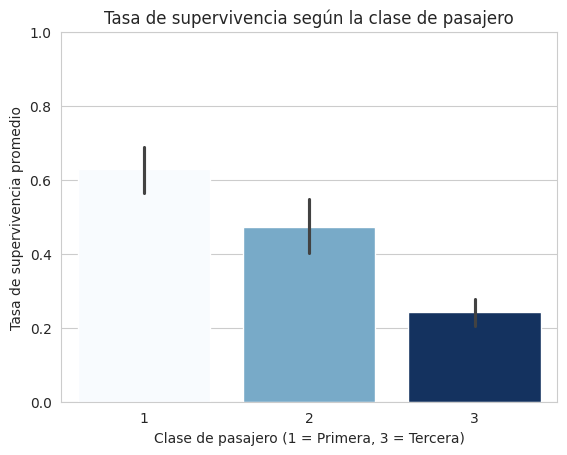

In [9]:
# ============================================================
# 3. Gráfico de barras de la tasa de supervivencia por clase
# ============================================================

# Configuramos estilo visual
sns.set_style("whitegrid")

# Creamos el gráfico de barras
sns.barplot(
    data=titanic,
    x="pclass",          # Eje X: clase del pasajero
    hue="pclass",
    y="survived",        # Eje Y: tasa de supervivencia
    estimator="mean",    # Calculamos el promedio de supervivencia por clase
    palette="Blues",      # Paleta de colores
    legend=False         # Sin leyenda
)

# Personalizamos el gráfico
plt.title("Tasa de supervivencia según la clase de pasajero")
plt.xlabel("Clase de pasajero (1 = Primera, 3 = Tercera)")
plt.ylabel("Tasa de supervivencia promedio")
plt.ylim(0, 1)  # Escala de 0 a 1 (porcentaje)
plt.show()

### **4. Relación entre edad y supervivencia (boxplot)**

Otra variable clave es la **edad** de los pasajeros.
Podemos preguntarnos:

> ¿Tuvo la edad alguna influencia en las probabilidades de sobrevivir?

Para analizarlo, utilizaremos un **diagrama de caja (boxplot)**, que permite comparar la **distribución de edades** entre quienes **sobrevivieron** y quienes **no**.

El boxplot muestra:

* La **mediana** (línea central de la caja).
* El **rango intercuartílico** (la caja).
* Los **valores atípicos** (puntos individuales).

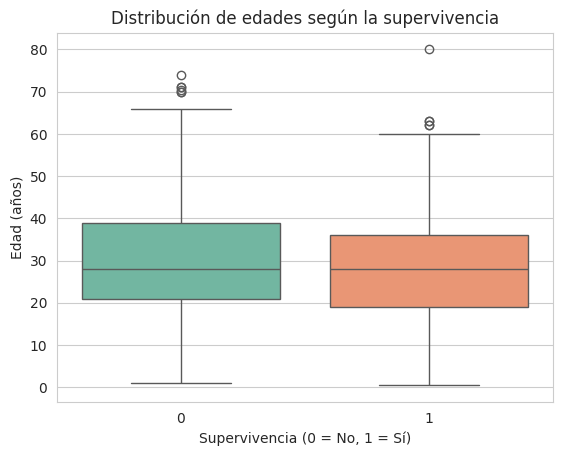

In [10]:
# ============================================================
# 4. Análisis de la relación entre edad y supervivencia
# ============================================================

# Creamos un diagrama de caja (boxplot) para comparar las edades según supervivencia
sns.boxplot(
    data=titanic,
    x="survived",        # Eje X: 0 = no sobrevivió, 1 = sobrevivió
    hue="survived",
    y="age",             # Eje Y: edad
    palette="Set2",      # Paleta de colores suaves
    legend=False         # Sin leyenda
)

# Personalizamos el gráfico
plt.title("Distribución de edades según la supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Edad (años)")
plt.show()

### Extra: Histogramas

Esto no se pide, pero está bueno como para sumar herramientas a nuestro cuaderno. Le pedí ayuda a **ChatGPT** para escribir este código, que genera dos histogramas comparables (lado a lado) de la distribución de edades: uno para quienes sobrevivieron y otro para quienes no.

Usa los mismos bins y ejes compartidos para facilitar la comparación.

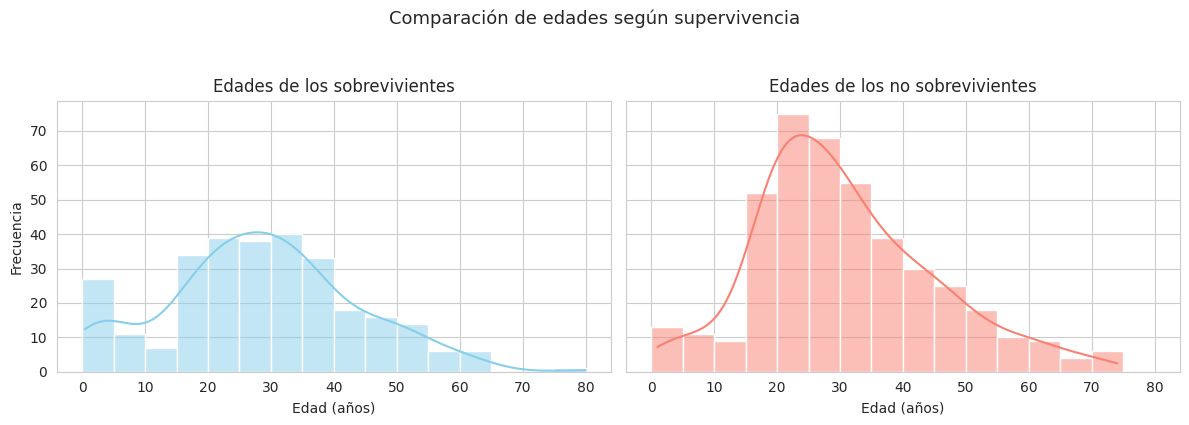

In [11]:
# ============================================================
# Histogramas de edades: comparación entre sobrevivientes y no sobrevivientes
# ============================================================

# Mantenemos solo las filas donde conocemos la edad
titanic_con_edad = titanic.dropna(subset=["age"])

# Definimos los intervalos (bins) del histograma, cada 5 años
# Por ejemplo: 0-5, 5-10, 10-15, ..., hasta 80
bins = np.arange(0, 85, 5)

# Configuramos el estilo de los gráficos
sns.set_style("whitegrid")

# Creamos una figura con DOS gráficos (uno al lado del otro)
# sharex y sharey hacen que ambos usen la misma escala en los ejes,
# para poder comparar fácilmente las distribuciones.
fig, ejes = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 4),
    sharex=True, sharey=True
)

# Histograma de los que sobrevivieron (survived = 1)
sns.histplot(
    data=titanic_con_edad[titanic_con_edad["survived"] == 1],  # solo sobrevivientes
    x="age",         # variable de edad
    bins=bins,       # intervalos definidos antes
    color="skyblue", # color suave para distinguir
    ax=ejes[0],      # lo dibujamos en el gráfico de la izquierda
    kde=True
)
ejes[0].set_title("Edades de los sobrevivientes")
ejes[0].set_xlabel("Edad (años)")
ejes[0].set_ylabel("Frecuencia")

# Histograma de los que no sobrevivieron (survived = 0)
sns.histplot(
    data=titanic_con_edad[titanic_con_edad["survived"] == 0],  # solo no sobrevivientes
    x="age",
    bins=bins,
    color="salmon",
    ax=ejes[1],  # gráfico de la derecha
    kde=True
)
ejes[1].set_title("Edades de los no sobrevivientes")
ejes[1].set_xlabel("Edad (años)")
ejes[1].set_ylabel("")  # no repetimos etiqueta del eje Y

# Ajustamos el diseño y mostramos
plt.suptitle("Comparación de edades según supervivencia", y=1.05, fontsize=13)
plt.tight_layout()
plt.show()




### **5. Interpretación de los resultados**

#### **Supervivencia por clase:**
El análisis muestra una clara diferencia entre las clases del Titanic.
Los pasajeros de **1ª clase** tuvieron una **tasa de supervivencia significativamente mayor** que los de 2ª y 3ª clase.
Esto puede explicarse por su **ubicación más cercana a la cubierta**, el **acceso prioritario a los botes salvavidas** y las **diferencias socioeconómicas** propias de la época.

#### **Relación entre edad y supervivencia:**
El boxplot evidencia que la mayoría de los pasajeros sobrevivientes eran **jóvenes o de mediana edad**, aunque existe una gran dispersión.
También se observan algunos valores extremos (outliers), lo que indica que hubo tanto niños como adultos mayores entre los sobrevivientes y fallecidos.

#### **Justificación de los gráficos:**

* El **gráfico de barras** permite comparar rápidamente la tasa de supervivencia entre las tres clases, mostrando una tendencia clara y ordenada.
* El **boxplot** es ideal para estudiar la **distribución de una variable numérica (edad)** en relación con una **variable categórica binaria (supervivencia)**, revelando diferencias en medianas y dispersión.

En conjunto, estos gráficos nos ayudan a **formular hipótesis iniciales** sobre la influencia de la clase social y la edad en la supervivencia de los pasajeros del Titanic.

